<a href="https://colab.research.google.com/github/waltersalles/QuarentenaDadosAlura/blob/master/Desafio1alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt



filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")
filmes.columns = ["IdFilme", "Título", "Gêneros"]
filmes.head()

,IdFilme,Título,Gêneros
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
notas = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/ratings.csv")
notas.columns = ["IdUsuário", "IdFilme", "Nota", "Tempo"]
notas.head()

,IdUsuário,IdFilme,Nota,Tempo
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [0]:
medias = round(notas.groupby("IdFilme")["Nota"].mean(), 2)

In [5]:
filmes_media = filmes.join(medias, on="IdFilme")
filmes_media.columns = ["IdFilme", "Título", "Gêneros", "Média"]
filmes_media["Média"].fillna(0.001, inplace=True)
filmes_media.sort_values("Média", ascending=False).head(10)

,IdFilme,Título,Gêneros,Média
5690,27751,'Salem's Lot (2004),Drama|Horror|Mystery|Thriller,5.0
8821,131237,What Men Talk About (2010),Comedy,5.0
8818,131098,Saving Santa (2013),Animation|Children|Comedy,5.0
405,467,Live Nude Girls (1995),Comedy,5.0
8815,130978,Love and Pigeons (1985),Comedy|Romance,5.0
6762,59814,Ex Drummer (2007),Comedy|Crime|Drama|Horror,5.0
9281,157775,Tenchi Muyô! In Love (1996),Animation|Comedy,5.0
9284,158027,SORI: Voice from the Heart (2016),Drama|Sci-Fi,5.0
8813,130970,George Carlin: Life Is Worth Losing (2005),Comedy,5.0
9289,158398,World of Glory (1991),Comedy,5.0


In [0]:
contagem_notas = notas.groupby("IdFilme")["Nota"].count().astype('Int64')

In [7]:
filmes_contagem = filmes.join(contagem_notas, on="IdFilme")
filmes_contagem.columns = ["IdFilme", "Título", "Gêneros", "QntNotas"]
print("Os 10 filmes mais votados são:")
filmes_contagem.sort_values("QntNotas", ascending = False).head(10)

Os 10 filmes mais votados são:


,IdFilme,Título,Gêneros,QntNotas
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238
97,110,Braveheart (1995),Action|Drama|War,237
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224
461,527,Schindler's List (1993),Drama|War,220


In [8]:
print("Os filmes sem nota são:")
filmes_media.query("Média == 0.001").drop(["Média", "Gêneros"], axis = 1)

Os filmes sem nota são:


,IdFilme,Título
816,1076,"Innocents, The (1961)"
2211,2939,Niagara (1953)
2499,3338,For All Mankind (1989)
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)"
3118,4194,I Know Where I'm Going! (1945)
4037,5721,"Chosen, The (1981)"
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)"
4598,6849,Scrooge (1970)
4704,7020,Proof (1991)
5020,7792,"Parallax View, The (1974)"


In [9]:
analise_notas = filmes_contagem.join(medias, on='IdFilme')
analise_notas.columns = ['IdFilme', 'Título', 'Gêneros', 'QntNotas', 'Média']
print("Os filmes com notas altas mas poucas avaliações são:")
analise_notas.query("Média == 5.00")

Os filmes com notas altas mas poucas avaliações são:


,IdFilme,Título,Gêneros,QntNotas,Média
48,53,Lamerica (1994),Adventure|Drama,2,5.0
87,99,Heidi Fleiss: Hollywood Madam (1995),Documentary,2,5.0
121,148,"Awfully Big Adventure, An (1995)",Drama,1,5.0
405,467,Live Nude Girls (1995),Comedy,1,5.0
432,495,In the Realm of the Senses (Ai no corrida) (1976),Drama,1,5.0
...,...,...,...,...,...
9611,176601,Black Mirror,(no genres listed),1,5.0
9633,179133,Loving Vincent (2017),Animation|Crime|Drama,1,5.0
9634,179135,Blue Planet II (2017),Documentary,1,5.0
9688,184245,De platte jungle (1978),Documentary,1,5.0


Digite o Id do filme que deseja analisar o comportamento:
111


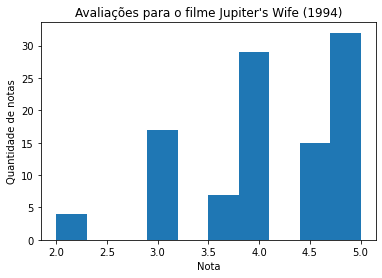

In [10]:
print ("Digite o Id do filme que deseja analisar o comportamento:")
busca = int(input())
notas.query("IdFilme == @busca")["Nota"].plot(kind = 'hist')
plt.title('Avaliações para o filme {}'.format(filmes.loc[busca - 1, "Título"]))
plt.ylabel('Quantidade de notas')
plt.xlabel('Nota')
plt.show()

In [11]:
generos = pd.DataFrame(data=filmes["Gêneros"].str.split("|").tolist(), index = filmes["Título"]).stack()
generos = generos.reset_index([0,"Título"])
generos.columns = ["Título", "Gêneros"]
generos.head(10)

,Título,Gêneros
0,Toy Story (1995),Adventure
1,Toy Story (1995),Animation
2,Toy Story (1995),Children
3,Toy Story (1995),Comedy
4,Toy Story (1995),Fantasy
5,Jumanji (1995),Adventure
6,Jumanji (1995),Children
7,Jumanji (1995),Fantasy
8,Grumpier Old Men (1995),Comedy
9,Grumpier Old Men (1995),Romance


In [12]:
contagem_generos = generos.groupby("Gêneros").count().astype('Int64')
contagem_generos = contagem_generos.reset_index([0,"Gêneros"])
contagem_generos.columns = ["Gêneros","QntFilmes"]
contagem_generos.sort_values("QntFilmes", ascending=False)

,Gêneros,QntFilmes
8,Drama,4361
5,Comedy,3756
17,Thriller,1894
1,Action,1828
15,Romance,1596
2,Adventure,1263
6,Crime,1199
16,Sci-Fi,980
11,Horror,978
9,Fantasy,779


In [13]:
print("Os filmes sem gênero listado são:")
generos.query("Gêneros == '(no genres listed)'").drop("Gêneros", axis = 1)

Os filmes sem gênero listado são:


,Título
19492,La cravate (1957)
19881,Ben-hur (2016)
19888,Pirates of the Caribbean: Dead Men Tell No Tal...
20100,Superfast! (2015)
20229,Let It Be Me (1995)
20373,Trevor Noah: African American (2013)
20664,Guardians (2016)
20699,Green Room (2015)
20733,The Brand New Testament (2015)
20772,Hyena Road


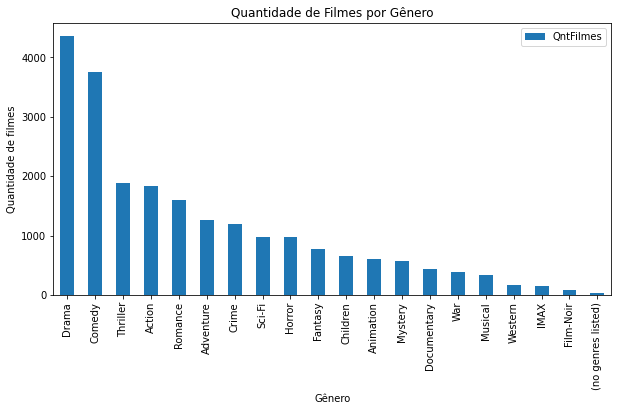

In [14]:
contagem_generos.set_index('Gêneros', inplace=True)
contagem_generos.sort_values("QntFilmes", ascending= False).plot(kind = 'bar', title = "Quantidade de Filmes por Gênero", figsize = (10,5))
plt.ylabel('Quantidade de filmes')
plt.xlabel('Gênero')
plt.show()